# Worksheet 2 - Scientific Visualisation MVE080/MMG640
## Colours, proportions, associations and time-series

This is the first worksheet in the course *Scientific Visualisation*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualisations using plotnine. Once you have finished all the tasks, export this document as an HTML file and upload it in Canvas. 

The goal of these homeworks is to learn how to improve your skills in visualising your science. You solve the homeworks in groups, however annotate all the code (even the theoretical parts) with who solved each question. **Eventhough the homework is submitted as a group you will be *individually* evaluated**. Motivate your choice of graph, legend, colourmap etc below your graph in a separate cell. 

Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. 

Throughout the assignment you shall use a Python workflow.
If you are completely new to Python, take a look at [this page](pythonbasics.org).
Python can do essentially all that MATLAB can, plus more. 
In this course we shall use Python in different contexts, starting with the [Jupyter Notebook interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html). 

Matrices and arrays are handled through the NumPy module. [Learn here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) how NumPy is different from MATLAB.

The below loads the packages required for this homework.

In [6]:
import numpy as np
import pandas as pd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 4, 10, 11, 12 and 13 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 3, we discussed colour palettes for categorical data. Briefly describe and motivate the three key properties we want a good categorical colour palette to have.

### Answer 1.1
We want colors that are...
* Distinct enough from each other so one can quickly match with legend

* Colorblind-friendly

* Easy to name! (No "maroon" vs "dark red" confusion!)

### Question 1.2

In Lecture 3, we used pie and bar charts to visualise proportions. Briefly discuss the benefits and drawbacks with using bar charts and pie charts for this purpose.

### Answer 1.2
* Pie charts show "part of whole" intuitively at a glance... but it's hard to tell exact amounts from angles, so each circle section must be complemented with numbers, which can be noisy and lead to overlap. It especially gets noisy when there are many groups within the pie chart.

* Bar charts make it easier to compare values accurately and are readable even when there are 10+ groups... but they give less of an immediate sense of "part of whole" like pie charts do, and they also take up more space.

### Question 1.3

In Lecture 3, we used a mosaic plot to analyse the Titanic data. Now consider Fig. 11.3 in the course book, what are the main takeaways we can read from this visual?

### Answer 1.3
* The emerging era had the least amount of bridges built in it, the mature era hade the most amount of bridges built in it.
* The most common material used for bridges in the crafts era was wood, then all eras thereafter, steel became the big player.
* Wood and iron was used less and less as humankind progressed, in favor of using steel.

### Question 1.4

In Lecture 4 we used a bubble chart (see also Fig. 12.3 in the course book). Why is this typically not a good option if we want to identify relationships (e.g. correlated variables) in the data?

### Answer 1.4
Humans are bad at judging area and bubbles tend to overlap which can make clusters hard to see or hide scatter shape. If the goal is to understand correlation between variables, bubble charts add unnecessary visual complexity and cognitive load!

### Question 1.5

Consider Fig. 13.10 in the course book. What is main benefit of a connected scatter plot, and what is important to think about when creating such a visual?

### Answer 1.5
The main benefit is that a connected scatter plot actually shows the trajectory of a relationship between two variables over time/space/etc. It's important to make the ordering and direction clear so the sequence is followable, with e.g. gradients and labels as they do in Fig. 13.10 or with arrows. Connected scatter plots can easily get tangled and noisy if there are many loops and crossings, so you might need to smooth the path or be EXTRA clear with labeling/directional cues.


## Colours 

For this part reading chapter 4 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Colours can be a powerful tool for highlighting. Using the Simpson's paradox data on Canvas, make a scatter plot where you highlight category D3 (all other categories can have the same colour). Briefly motivate your choice of palette.

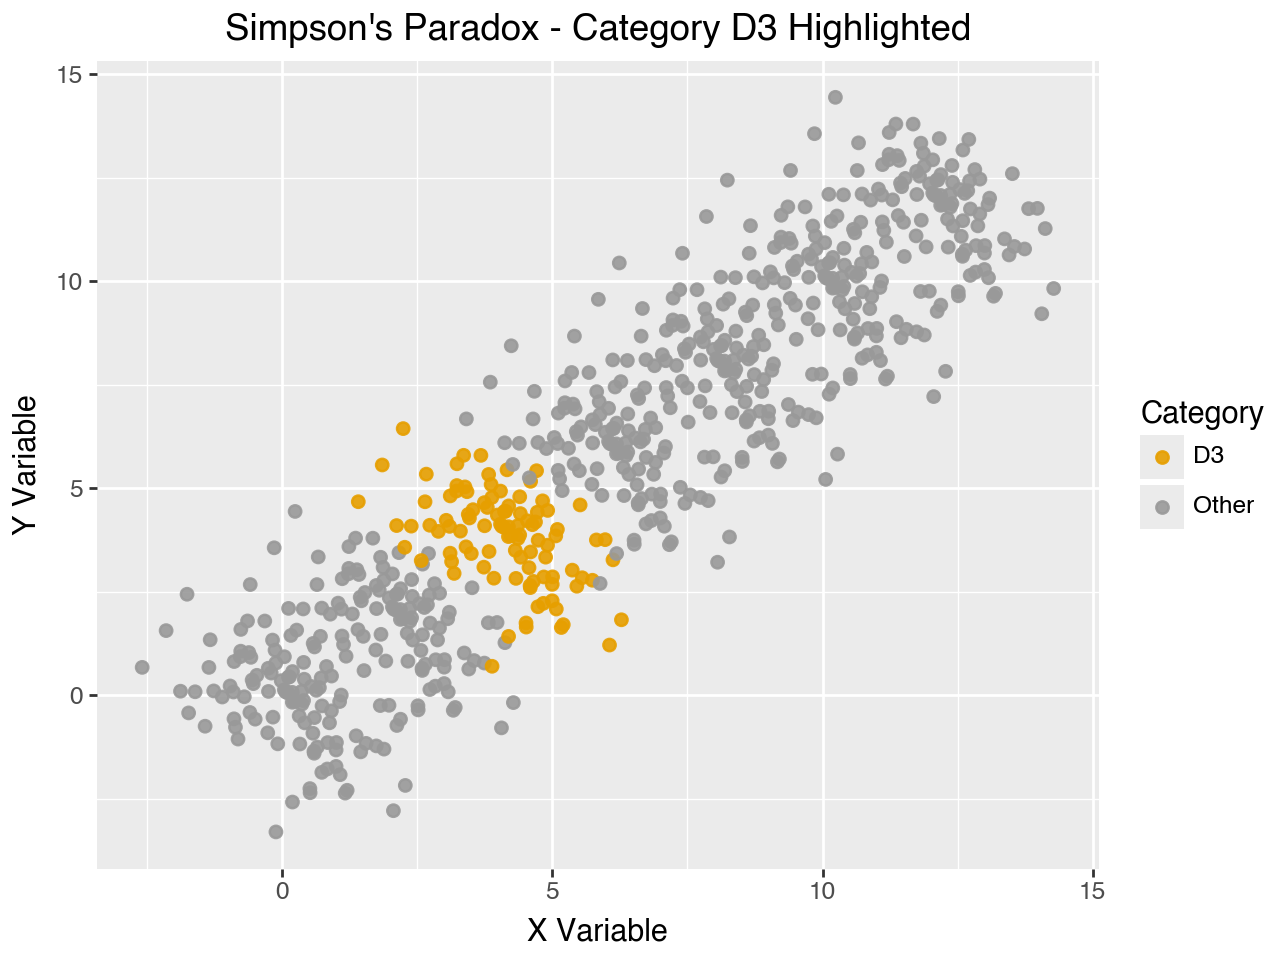

In [7]:
# Insert code here 
# Remember to print the visual 
simpsons_data = pd.read_csv('Homework2_resources/Simpson_paradox.csv')

simpsons_data['highlight'] = simpsons_data['dataset'].apply(
    lambda x: 'D3' if x == 'D3' else 'Other'
)

(ggplot(simpsons_data, aes(x='x', y='y', color='highlight')) +
        geom_point(size=2, alpha=0.9) +
        scale_color_manual(values={'D3': cbPalette[0], 'Other': cbPalette[7]}) +
        labs(title="Simpson's Paradox - Category D3 Highlighted",
             x='X Variable',
             y='Y Variable',
             color='Category'))

# print(plot)

*Brief motivation*

We highlighted category D3 using a bright color (orange) while displaying all other categories in neutral gray. This creates a strong visual contrast that immediately draws attention to D3 points. The approach effectively isolates the D3 pattern for examining Simpson's paradox while maintaining context by keeping other data visible but not emphasized. This color strategy reduces cognitive load by focusing viewer attention on the relevant category.

### Question 2.2 

In Lecture 3, when comparing colourmaps, I plotted this function

$$
    z = 0.1 \mathrm{sin}(r) + \mathrm{cos}(r^2) \mathrm{exp}\Big(-\frac{x}{4 \pi} \Big) \ \mathrm{where} \\
    r = x^2 + y^2 \quad x, y \in [-4\pi, 4\pi],
$$

where I used colours to represent $z$. 

Now plot (as in Lecture 3 slide 3) the function

$$
    z = 0.1 \mathrm{sin}(r) + \mathrm{cos}(r^2) \mathrm{exp}\Big(-\frac{(0.5x)^2}{4 \pi} \Big) \ \mathrm{where} \\
    r = x^2 + y^2 \quad x, y \in [-4\pi, 4\pi],
$$

using three different [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that are sufficiently distinct. Using three monochrome maps (e.g Greys, Blues and Purples) does not count as sufficiently distinct. Code for how to use the rainbow desaturated colourmap is in the Lecture 3 notebook on Canvas.

For each colourmap briefly discuss its benefits based on what you can see from the plots you have created.

In [12]:
x = np.linspace(-4*np.pi, 4*np.pi, 500)
y = np.linspace(-4*np.pi, 4*np.pi, 500)
X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)
z = 0.1*np.sin(r) + np.cos(r**2)*np.exp(-(0.5*X)**2 / (4*np.pi))

# dataframe for plotting
data = pd.DataFrame({
    'x': X.flatten(),
    'y': Y.flatten(),
    'z': z.flatten()
})

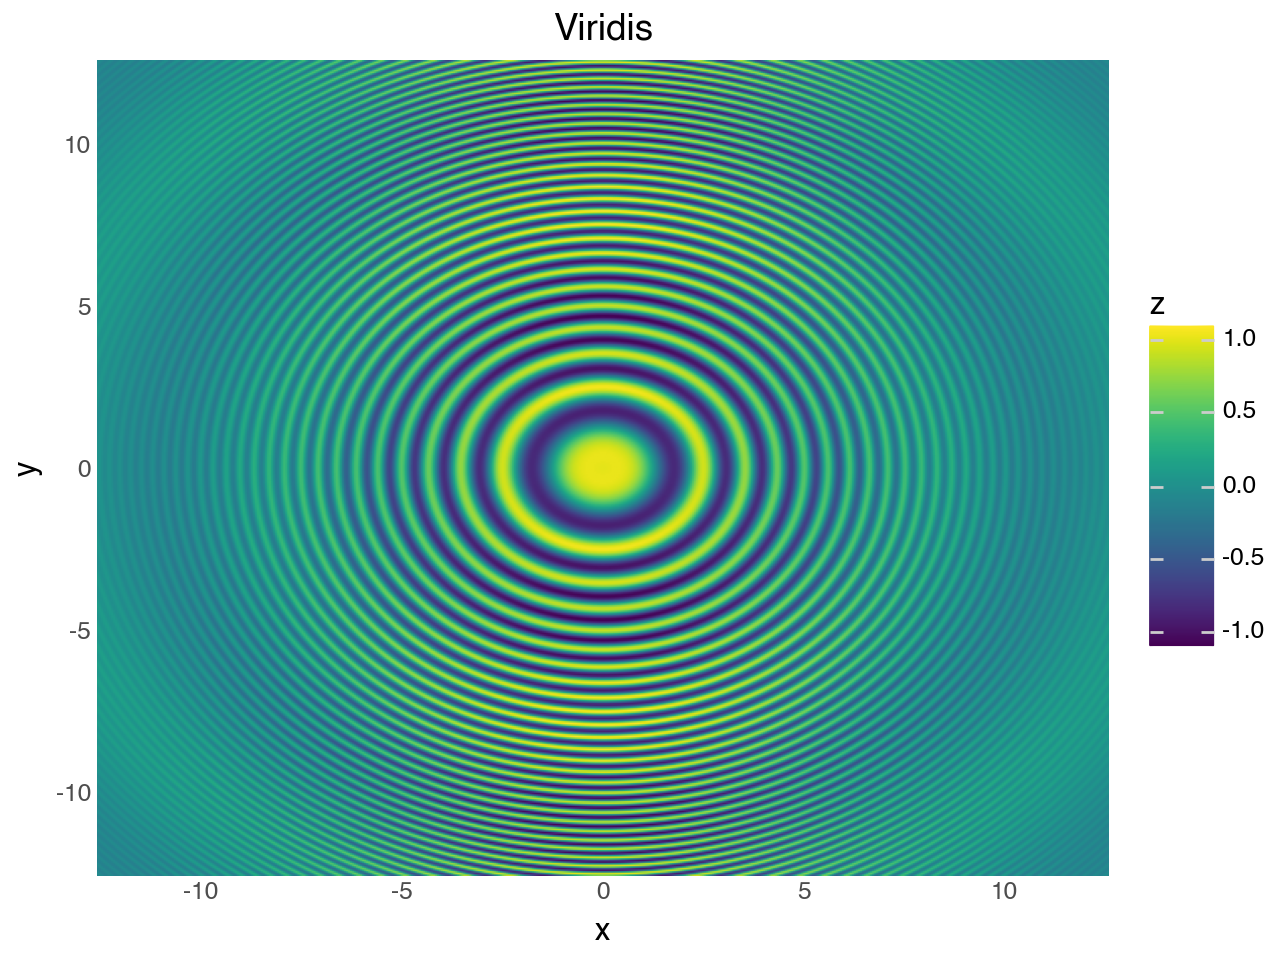

In [14]:
# Insert code here for colormap 1
# Remember to print the visual 
#p1 = 
(ggplot(data, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_cmap("viridis")
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Viridis")
    + theme_minimal())

# print(p1)

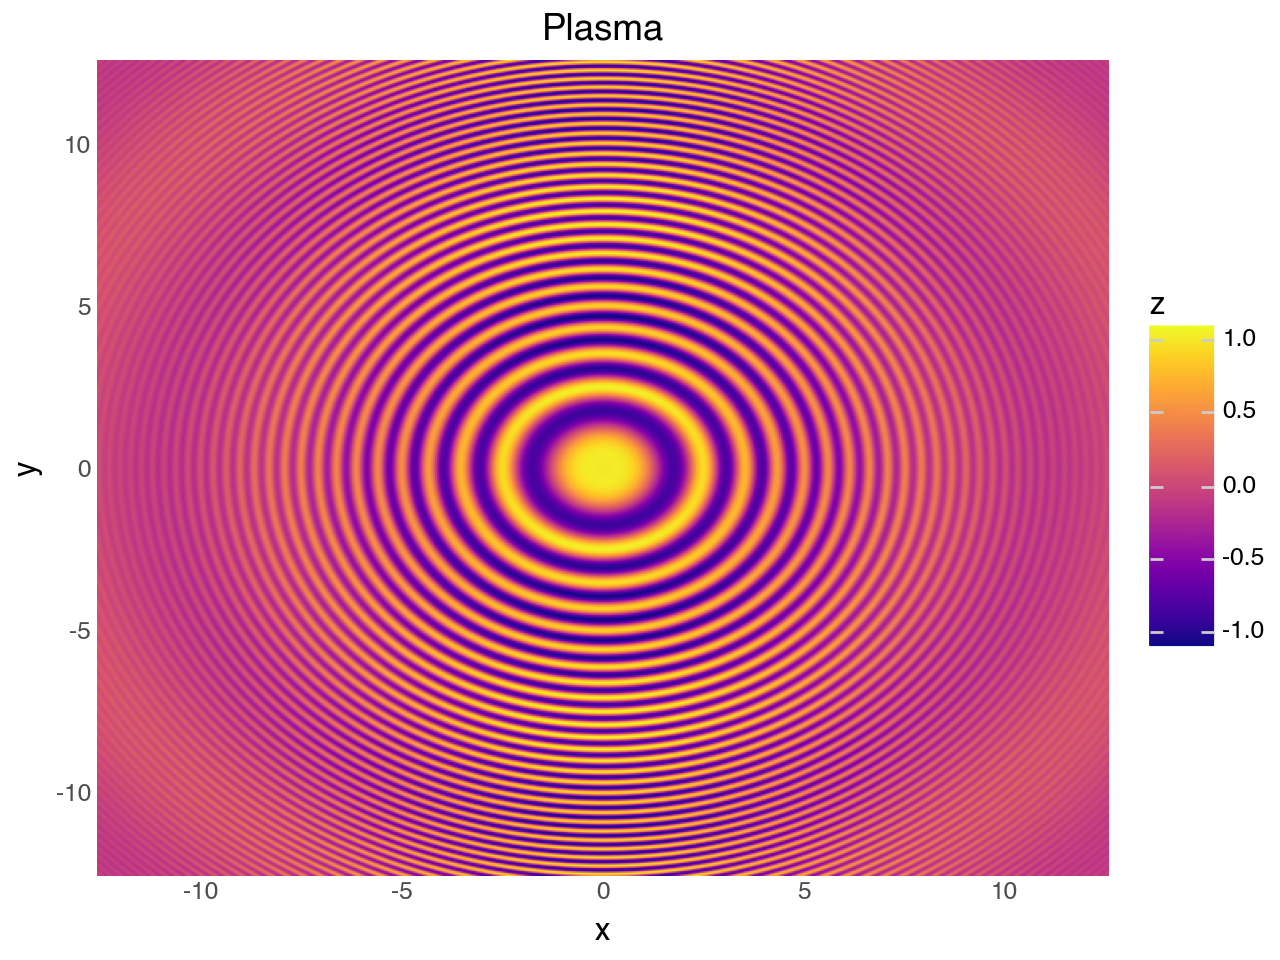

In [15]:
# Insert code here for colormap 2
# Remember to print the visual 
#p2 = 
(ggplot(data, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_cmap("plasma")
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Plasma")
    + theme_minimal())

#print(p2)

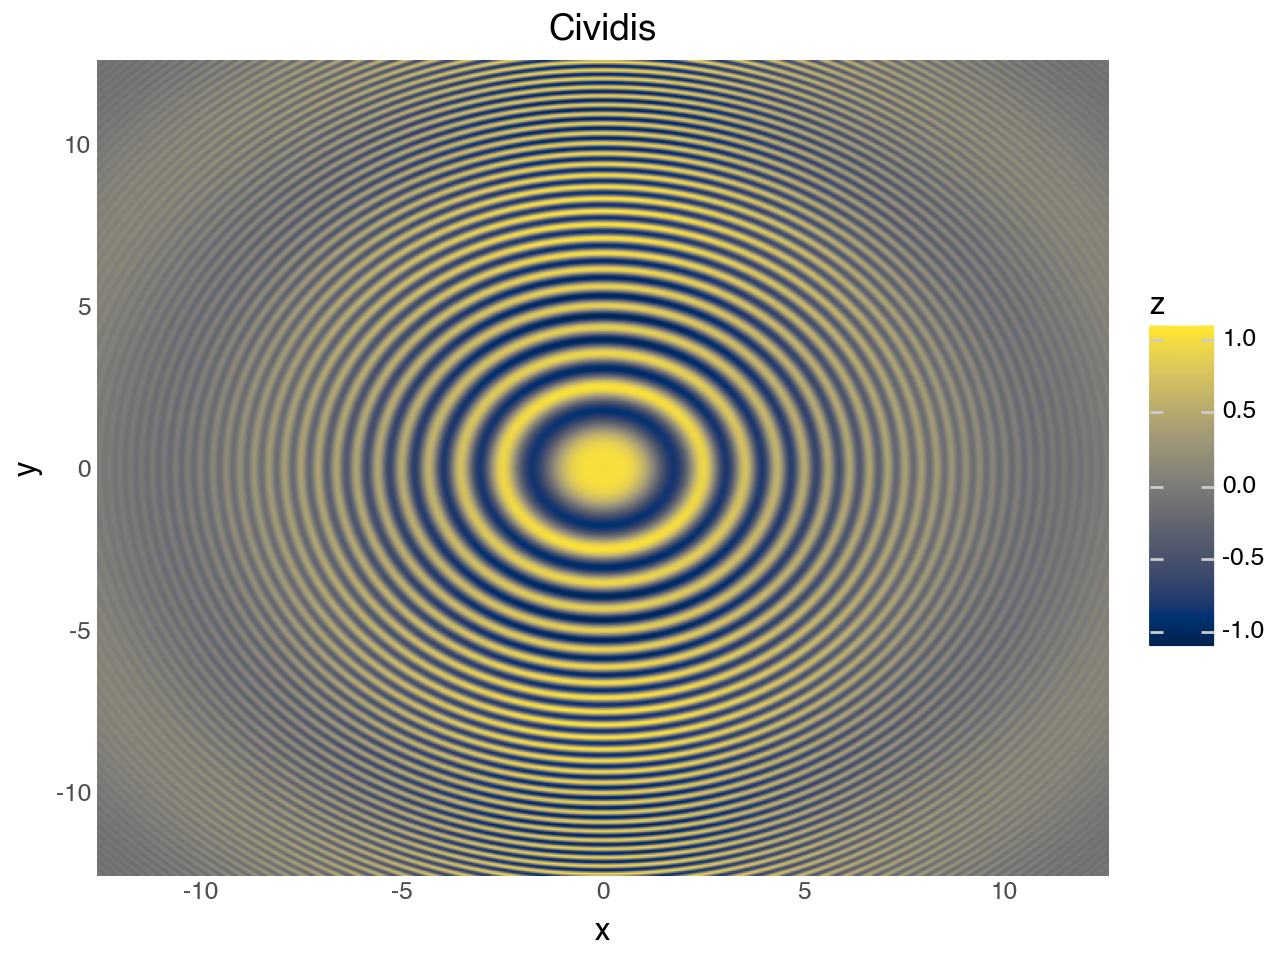

In [16]:
# Insert code here for colormap 3
# Remember to print the visual 
#p3 = 
(ggplot(data, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_cmap("cividis")
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Cividis")
    + theme_minimal())

#print(p3)

*Brief discussion*

- **Colormap 1 - Viridis:**
Viridis reveals the concentric ring structure clearly with smooth perceptual gradients from dark purple to bright yellow. Its perceptually uniform nature ensures equal visual steps correspond to equal data steps, making it excellent for identifying the Gaussian envelope decay and oscillatory patterns. It's also colorblind-friendly and prints well in grayscale.
- **Colormap 2 - Plasma:**
Plasma emphasizes high-value regions more dramatically with its bright yellow peaks, making the central Gaussian-modulated features pop visually. The purple-to-yellow gradient provides good contrast for distinguishing between positive and negative values of the function, though it may slightly over-emphasize extreme values compared to Viridis.
- **Colormap 3 - Cividis:**
Cividis offers optimal accessibility for colorblind viewers while maintaining perceptual uniformity. The blue-to-yellow scheme effectively shows the radial symmetry and wave patterns, though with less saturation than Viridis or Plasma. It's particularly effective for presentations where colorblind accessibility is a priority, without sacrificing the ability to discern fine structural details.

### Question 2.3

On Canvas, I have uploaded a forest coverage dataset. To load the data you can use the code below. Produce two visuals, one where it is easy to see forest coverage for different countries in the world, and one where it is easy to see which countries in the world have a below median forest coverage. Briefly motivate choice of colourmap.

In [17]:
# Code for reading the data in correct format 
import geopandas as gpd
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
data_forest = pd.read_csv("Homework2_resources/Forest_tidy-2.csv")

# Reading geometry
world_wsg84 = world.to_crs("EPSG:4326")
data_world_forest = world_wsg84.merge(data_forest, left_on="SOVEREIGNT", right_on="Country")

In [ ]:
# Insert code here for visual 1
# Remember to print the visual 

In [ ]:
# Insert code here for visual 2
# Remember to print the visual 

*Brief motivation*

### Question 2.4

On slide 22 in Lecture 3 (and on Canvas), there is a recreation using Swedish data of the famous cover page for the economist climate issue. Using the weather data on Canvas, recreate this visual.

**Hint 1**: You can use the following syntax to get the colours correct;

~~~
# Color palette 
color_list = [np.array([103,0,31]) / 256,
              np.array([178,24,43]) / 256, 
              np.array([214,96,77]) / 256, 
              np.array([244,165,130]) / 256, 
              np.array([253,219,199]) / 256, 
              np.array([247,247,247]) / 256, 
              np.array([209,229,240]) / 256, 
              np.array([146,197,222]) / 256, 
              np.array([67,147,195]) / 256, 
              np.array([33,102,172]) / 256, 
              np.array([5,48,97]) / 256]

# Used in the ggplot call 
# [::-1] reverses an array (I entered the color in wrong order :)
    + scale_fill_gradientn(colors=color_list[::-1], name = "Temperature [C]")
~~~


In [ ]:
# Insert code here 
# Remember to print the visual 

## Time-series

For this part reading chapter 13 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.



### Question 3.1

In the lecture, I showed how we can use points, lines or both to visualise a single time series. Another way is to use area (Fig. 13.4 in the [course book](https://clauswilke.com/dataviz/)). Using the inflation data (on Canvas), choose a country and visualise its inflation over time using i) dots, ii) lines and iii) line with area shaded under it. Briefly discuss the benefit of also including the area.

In [ ]:
# Insert code here for dots
# Remember to print the visual 

In [ ]:
# Insert code here for lines
# Remember to print the visual 

In [ ]:
# Insert code here for area
# Remember to print the visual 

*Brief motivation*

### Question 3.2

Using the inflation data, choose 7 countries and visualise in a single plot (you are allowed to use facets) their inflation over time. I recommend a you-are-here graphic (slide 12 Lecture 4). 

Briefly motivate your choice of plot.

In [ ]:
# Insert code here 
# Remember to print the visual 

*Brief motivation*

### Question 3.3 

The connected scatter plot (Fig. 13.10 in the [course book](https://clauswilke.com/dataviz/)) is an approach that allows us to visualise two separate time-dependent variables. On the webpage, I have uploaded an example for a connected scatter plot where I plot unemployment rate and apartment prices for Sweden from 1996-2020. Use the dataset on Canvas to recreate this visual. Briefly comment what you think is the main takeaway message from the plot. 

In [ ]:
# Insert code here 
# Remember to print the visual 

*Brief motivation*

## Proportions 

For this part reading chapter 10-11 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 4.1 

Consider the Swedish election data from 2010 and 2014 which I have added below. Visualize the data such that it is easy to see, in a single plot, which was the third biggest party in 2010 and 2014.


In [ ]:
swedish_election_2010 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [112, 19, 25, 23, 24, 107, 19, 20],
                                      "Year" : 2018, 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2014 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [113, 21, 25, 22, 19, 84, 16, 49],
                                      "Year" : 2014, 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2010["Frac_seats"] = swedish_election_2010["Number_of_seats"] / np.sum(swedish_election_2010["Number_of_seats"]) * 100
swedish_election_2014["Frac_seats"] = swedish_election_2014["Number_of_seats"] / np.sum(swedish_election_2014["Number_of_seats"]) * 100

data_election = pd.concat([swedish_election_2010, swedish_election_2014])
data_election
# Remember to print the visual 


Party  Number_of_seats  Year    Color  Frac_seats
0     Social Democrats              112  2018  #E8112d   32.091691
1           Left Party               19  2018  #DA291C    5.444126
2          Green Party               25  2018  #83CF39    7.163324
3         Centre Party               23  2018  #009933    6.590258
4        Liberal Party               24  2018  #006AB3    6.876791
5       Moderate Party              107  2018  #52BDEC   30.659026
6  Christian Democrats               19  2018  #000077    5.444126
7     Sweden Democrats               20  2018  #DDDD00    5.730659
0     Social Democrats              113  2014  #E8112d   32.378223
1           Left Party               21  2014  #DA291C    6.017192
2          Green Party               25  2014  #83CF39    7.163324
3         Centre Party               22  2014  #009933    6.303725
4        Liberal Party               19  2014  #006AB3    5.444126
5       Moderate Party               84  2014  #52BDEC   24.068768
6  Christian Democrats               16  2014  #000077    4.584527
7     Sweden Democrats               49  2014  #DDDD00   14.040115

### Question 4.2

In the lecture, we discuss that stalked charts (e.g. stacked densities or stacked bars) often do not work if we want to study individual parts. Consider the stacked density graph on slide 29 in Lecture 3. Using the data on Canvas, create two different plots from which it is easier to see how the fraction GDP for the different has changed over the years. Motivate your choice. 

In [ ]:
# Insert code here visual 1 
# Remember to print the visual 

In [ ]:
# Insert code here visual 2 
# Remember to print the visual 

_Brief motivation_

### Question 4.3

In some cases a stacked chart works well. On Canvas, I have uploaded one such example. Use the Canvas dataset recreate this visual.


In [ ]:
# Insert code here visual 
# Remember to print the visual 

_Motivate why it does work in this case_

## Assocations 

For this part reading chapter 10-11 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 5.1 

Using the dataset with different indicators, such as life-happiness, perception of corruption etc..., compare two variables using a scatter plot. Briefly discuss the take-away from the visual. In the plot colour the different continents.

In [ ]:
# Insert code here 
# Remember to print the visual 

*Brief motivation*

### Question 5.2 

Let us explore the dataset in question 5.1 a bit deeper. Choose five different variables and create two different visuals where we can clearly see the associations between all pair of variables. Briefly discuss the take-away from the visual. 

In [ ]:
# Insert code here visual 1
# Remember to print the visual 

In [ ]:
# Insert code here visual 2
# Remember to print the visual 

*Brief motivation*

### Question 5.3

Has the amount of $\mathrm{CO}_2$ released per person increased from 1970 to 2018 for a majority of countries, and if yes what magnitude of increase are we talking about? Use the $\mathrm{CO}_2$ on Canvas and create a visual which answers these questions.

In [ ]:
# Insert code here 
# Remember to print the visual 

_Motivate your answer here_